# Importing the neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm

# Importing the Dataset

In [2]:
data=pd.read_csv(r"C:\Users\USER\Desktop\Traffic_Project\traffic_volume.csv")

# Analysing the Data

In [3]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [4]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


# Checking the null values

In [6]:
data.isnull().sum()

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

# Handling the missing values

In [7]:
data['temp'].fillna(data['temp'].mean(),inplace=True)
data['rain'].fillna(data['rain'].mean(),inplace=True)
data['snow'].fillna(data['snow'].mean(),inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_2732\3727727439.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['temp'].fillna(data['temp'].mean(),inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_2732\3727727439.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [8]:
from collections import Counter

In [9]:
print(Counter(data['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [10]:
data['weather'].fillna('Clouds',inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_2732\1731991201.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['weather'].fillna('Clouds',inplace=True)


In [11]:
data.isnull().sum()

holiday           48143
temp                  0
rain                  0
snow                  0
weather               0
date                  0
Time                  0
traffic_volume        0
dtype: int64

# Encoding the data

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
data['weather'] = le.fit_transform(data['weather'])

In [15]:
data['holiday'] = le.fit_transform(data['holiday'])

In [16]:
import matplotlib.pyplot as plt

In [17]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,11,288.28,0.0,0.0,1,02-10-2012,09:00:00,5545
1,11,289.36,0.0,0.0,1,02-10-2012,10:00:00,4516
2,11,289.58,0.0,0.0,1,02-10-2012,11:00:00,4767
3,11,290.13,0.0,0.0,1,02-10-2012,12:00:00,5026
4,11,291.14,0.0,0.0,1,02-10-2012,13:00:00,4918


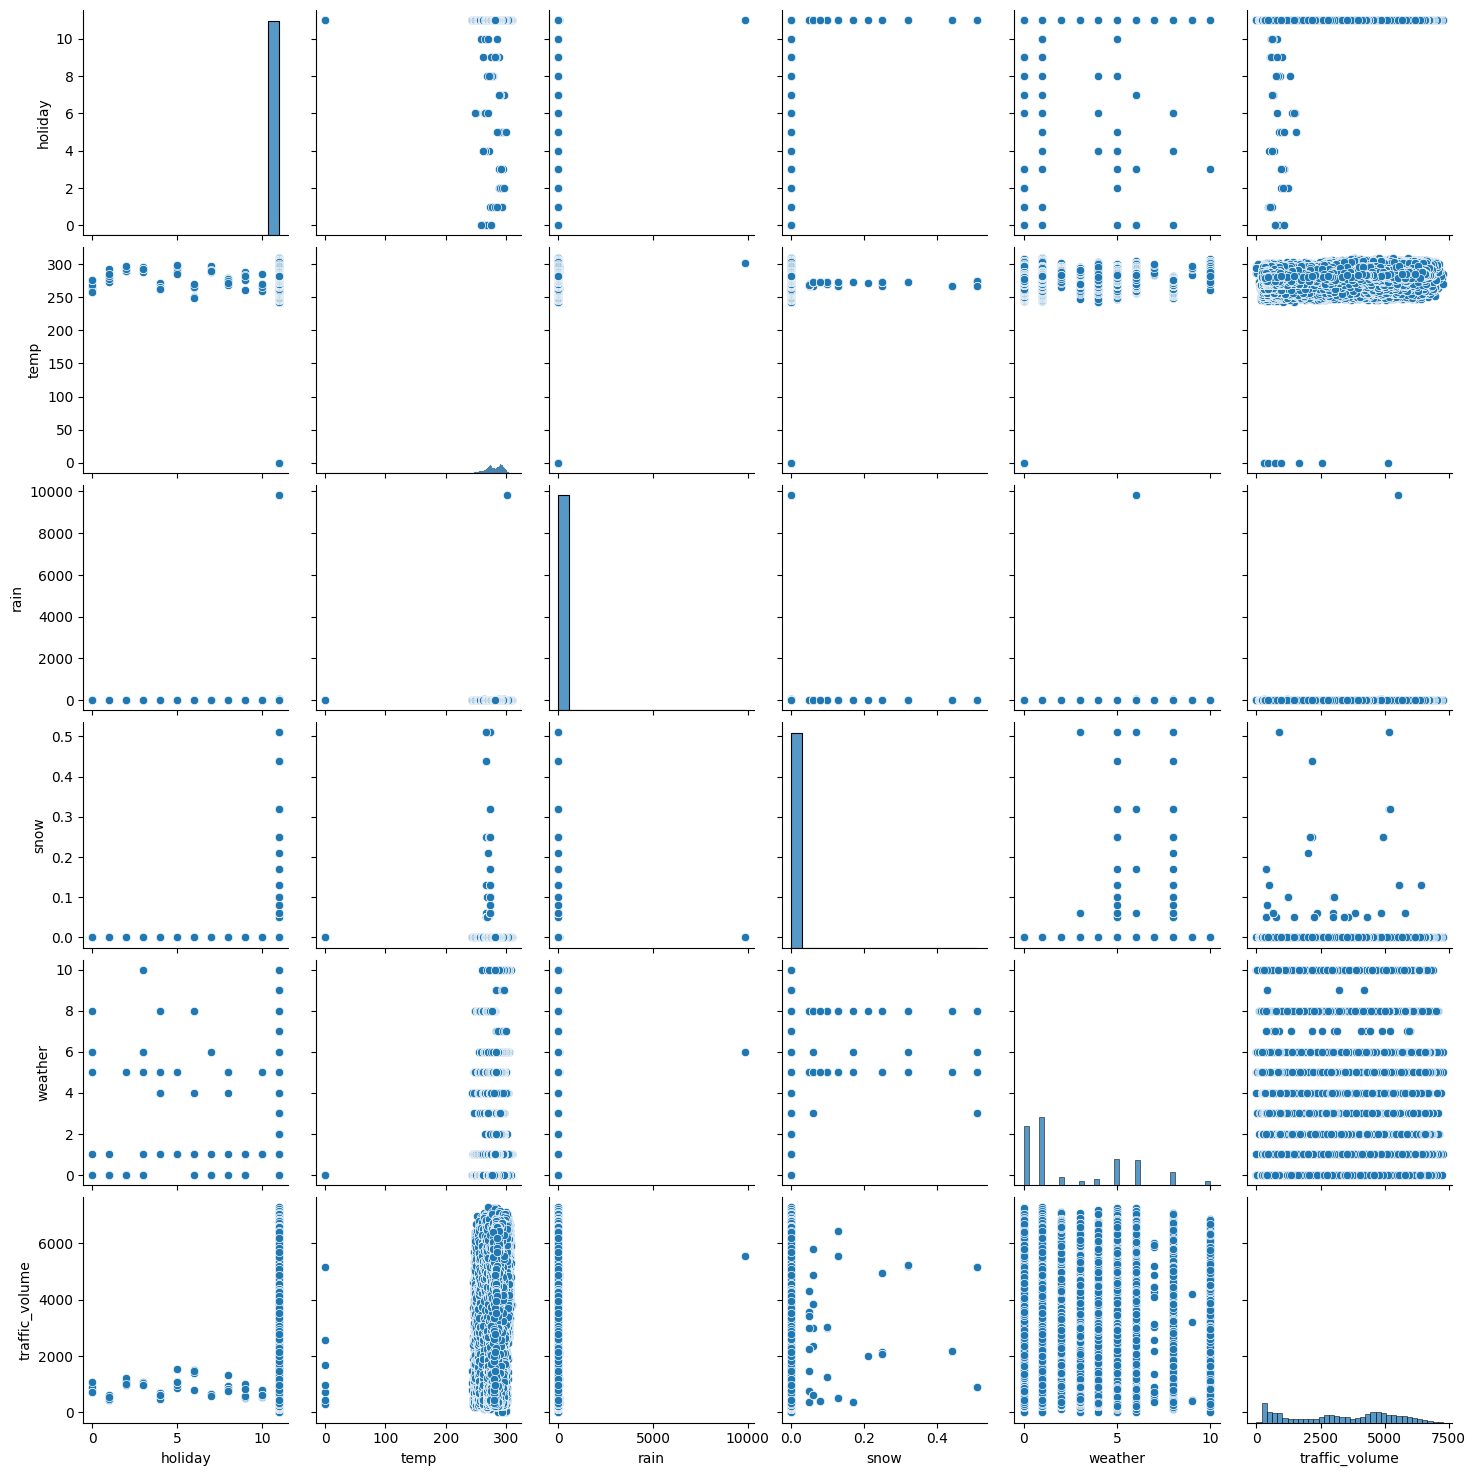

In [18]:
sns.pairplot(data)

<Axes: >

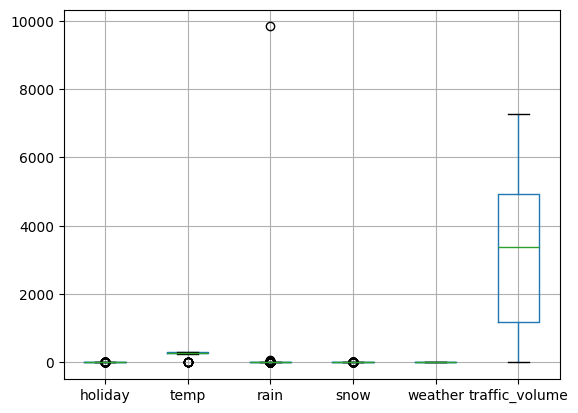

In [19]:
data.boxplot()

# Splitting Date and Time

In [20]:
data[["day","month","year"]] = data["date"].str.split("-", expand = True)

In [21]:
data[["hours", "minutes", "seconds"]] = data["Time"].str.split(":", expand = True)

In [22]:
data.drop(columns=['date','Time'],axis=1,inplace=True)

In [23]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,11,288.28,0.0,0.0,1,5545,02,10,2012,09,00,00
1,11,289.36,0.0,0.0,1,4516,02,10,2012,10,00,00
2,11,289.58,0.0,0.0,1,4767,02,10,2012,11,00,00
3,11,290.13,0.0,0.0,1,5026,02,10,2012,12,00,00
4,11,291.14,0.0,0.0,1,4918,02,10,2012,13,00,00


# Splitting The Dataset Into Dependent And Independent Variable

In [24]:
y = data['traffic_volume']
x = data.drop(columns=['traffic_volume'],axis=1)

In [25]:
names = x.columns

# Feature scaling

In [26]:
from sklearn.preprocessing import scale

In [27]:
x = scale(x)

In [28]:
x = pd.DataFrame(x,columns=names)

In [29]:
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.031687,0.530485,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.031687,0.611467,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.031687,0.627964,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.031687,0.669205,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.031687,0.744939,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


# Splitting The Data Into Train And Test

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =0)

# Training And Testing The Model

# Initializing the model

In [32]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder


# Fitting the models with x_train and y_train

In [33]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR
# from sklearn.preprocessing import OneHotEncoder
# from xgboost import XGBRegressor

# Load dataset
data = pd.read_csv(r"C:\Users\USER\Desktop\Rappa Rappa\traffic_volume.csv")

# Combine date and time into a single datetime column
data['date_time'] = pd.to_datetime(data['date'] + ' ' + data['Time'], dayfirst=True)

# Create new time-based features
data['hour_of_day'] = data['date_time'].dt.hour
data['day_of_week'] = data['date_time'].dt.dayofweek
data['month'] = data['date_time'].dt.month

# Add dummy columns (customize later as needed)
data['road_type'] = 'highway'  # Dummy value, change with real data if available
data['sensor_reading'] = data['traffic_volume'] * 0.1  # Example logic

# Define features and target
features = ["hour_of_day", "day_of_week", "month", "weather", "road_type", "sensor_reading"]
target = "traffic_volume"

X = data[features]
y = data[target]

# Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_features = ["weather", "road_type"]
encoded_features = encoder.fit_transform(X[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Convert encoded features into DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)
X = X.drop(columns=categorical_features).reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)
X = pd.concat([X, encoded_df], axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lin_reg = LinearRegression()
dtree = DecisionTreeRegressor()
rand_forest = RandomForestRegressor(n_estimators=100, random_state=42)
svr = SVR()
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)


In [34]:
import pandas as pd

data = pd.read_csv(r"C:\Users\USER\Desktop\Rappa Rappa\traffic_volume.csv")
print(data.columns)


Index(['holiday', 'temp', 'rain', 'snow', 'weather', 'date', 'Time',
       'traffic_volume'],
      dtype='object')


Fitting the models with x_train and y_train

In [35]:
lin_reg.fit(X_train, y_train)
dtree.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)
svr.fit(X_train, y_train)
xgb.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Predicting the y_train values and calculate the accuracy

In [36]:
p1 = lin_reg.predict(X_train)
p2 = dtree.predict(X_train)
p3 = rand_forest.predict(X_train)
p4 = svr.predict(X_train)
p5 = xgb.predict(X_train)


# Regression Evaluation Metrics

In [37]:
from sklearn import metrics

#  R-squared _score 

In [38]:
print(metrics.r2_score(p1,y_train))
print(metrics.r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics.r2_score(p4,y_train))
print(metrics.r2_score(p5,y_train))

1.0
1.0
0.9999999964694705
0.9951760992383352
0.9999792575836182


In [39]:
p1 = lin_reg.predict(X_test)
p2 = dtree.predict(X_test)
p3 = rand_forest.predict(X_test)
p4 = svr.predict(X_test)
p5 = xgb.predict(X_test)


In [40]:
print(metrics.r2_score(p1,y_test))
print(metrics.r2_score(p2,y_test))
print(metrics.r2_score(p3,y_test))
print(metrics.r2_score(p4,y_test))
print(metrics.r2_score(p5,y_test))

1.0
0.9999999640306697
0.9999999782909486
0.9952128441433632
0.9999698996543884


# RMSE –Root Mean Square Error

In [41]:
MSE = metrics.mean_squared_error(p3,y_test)

In [42]:
np.sqrt(MSE)

np.float64(0.292962825446614)

# Saving the Model

In [43]:
import pickle

In [44]:
pickle.dump(rand_forest.fit,open("model.pkl",'wb'))
pickle.dump(le,open("encoder.pkl",'wb'))